# Mid-Term Project

Overview


1.Use Medicare CCLF Claims from Syntegra dataset to answer key business questions

2.Extra credit for building up on the questions below (additional questions + answers)

3.One Jupyter notebook solution with clear Python code and all cell outputs available

4.At least two data quality checks

# Step 1. Prepare raw input datasets

1.Load the datasets from Medicare datasets 

2.Clean the datasets

3.Remove the unused columns and delete the duplicate rows

4.Join the datasets and create the required dataframe to work on

Assumptions:

1.Claim ID (cur_clm_uniq_id) represents one claim, which may or may not have more than one code (code could be HCPCS/CPT, diagnosis, procedure...)

2.There is a one-to-many relationship between patient IDs (bene_mbi_id) and claim IDs (cur_clm_uniq_id), i.e. each claim is unique to one patient, but one patient can have more than one claim

# 1 Import required packages

In [3]:
import numpy as np
import pandas as pd


In [4]:
# Turn off the automatic setting that redacts the columns/rows from the dataframe output
pd.set_option('display.max_columns',None)

# 2 Load & select columns to be used from raw (original) datasets

# 2.1 Load & select columns from Claims Header dataset

In [5]:
#Load Claims header dataset
parta_claims_header_raw_df=pd.read_csv("/Users/madhumithaganta/Downloads/Medicare CCLF Claims/parta_claims_header.csv")
parta_claims_header_raw_df.sort_values(by=['cur_clm_uniq_id'])

,cur_clm_uniq_id,prvdr_oscar_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,clm_bill_fac_type_cd,clm_bill_clsfctn_cd,prncpl_dgns_cd,admtg_dgns_cd,clm_mdcr_npmt_rsn_cd,clm_pmt_amt,clm_nch_prmry_pyr_cd,prvdr_fac_fips_st_cd,bene_ptnt_stus_cd,dgns_drg_cd,clm_op_srvc_type_cd,fac_prvdr_npi_num,oprtg_prvdr_npi_num,atndg_prvdr_npi_num,othr_prvdr_npi_num,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,bene_eqtbl_bic_hicn_num,clm_admsn_type_cd,clm_admsn_src_cd,clm_bill_freq_cd,clm_query_cd,dgns_prcdr_icd_ind,clm_mdcr_instnl_tot_chrg_amt,clm_mdcr_ip_pps_cptl_ime_amt,clm_oprtnl_ime_amt,clm_mdcr_ip_pps_dsprprtnt_amt,clm_hipps_uncompd_care_amt,clm_oprtnl_dsprtnt_amt
510,100190,111821,1228,NaN,40,2018-06-10,2018-06-10,7,7,M1611,NaN,NaN,127.79,NaN,11,1,NaN,F,1780608992,NaN,1.972732e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,415.80,NaN,NaN,NaN,NaN,NaN
521,100402,100226,1261,NaN,60,2017-05-27,2017-06-02,1,1,K5733,K5733,NaN,10602.46,NaN,10,6,330.0,NaN,1689611501,NaN,1.285688e+09,NaN,NaN,NaN,NaN,NaN,1.0,1,1,3,0,70795.63,609.13,0.00,13.92,231.15,NaN
525,100464,360051,12978,NaN,40,2017-06-26,2017-06-26,1,3,R079,NaN,NaN,199.45,NaN,36,1,NaN,C,1073688354,NaN,1.982693e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,2709.80,NaN,NaN,NaN,NaN,NaN
536,100698,140276,11789,NaN,40,2017-07-28,2017-07-28,1,3,M545,NaN,NaN,85.25,NaN,14,1,NaN,C,1376521575,NaN,1.912991e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,115.00,NaN,NaN,NaN,NaN,NaN
540,100750,230216,12138,NaN,40,2018-01-13,2018-01-13,1,3,Z0289,NaN,N,0.00,NaN,23,9,NaN,C,1982685384,NaN,1.063442e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,0,226.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1698691,390145,10007,NaN,40,2016-12-11,2016-12-11,1,3,Z01818,NaN,NaN,43.01,NaN,39,1,NaN,C,1689691214,NaN,1.679505e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,235.00,NaN,NaN,NaN,NaN,NaN
4365,1698722,200021,10985,NaN,40,2018-06-16,2018-06-16,1,3,E782,NaN,NaN,179.09,NaN,20,1,NaN,C,1932164795,NaN,1.548289e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,1939.35,NaN,NaN,NaN,NaN,NaN
4366,1698935,210022,1297,NaN,40,2018-04-06,2018-04-06,1,3,I110,NaN,NaN,400.81,NaN,21,9,NaN,C,1205896446,NaN,1.922016e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,554.00,NaN,NaN,NaN,NaN,NaN
4367,1699005,100057,12194,NaN,40,2016-04-27,2016-04-27,1,3,I348,NaN,NaN,265.19,NaN,10,1,NaN,C,1821019571,NaN,1.437130e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,8423.00,NaN,NaN,NaN,NaN,NaN


# Data Quality Check #2.1.1: If true, the original dataset was unique on claim ID

In [6]:
parta_claims_header_raw_df_count = parta_claims_header_raw_df.shape[0]
parta_claims_header_raw_uniq_clm_id_df = parta_claims_header_raw_df['cur_clm_uniq_id'].drop_duplicates()

parta_claims_header_raw_df_count == parta_claims_header_raw_uniq_clm_id_df.shape[0]

True

In [7]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
parta_claims_header_df = parta_claims_header_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'atndg_prvdr_npi_num', 
    'clm_from_dt', 'prncpl_dgns_cd', 'clm_pmt_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'atndg_prvdr_npi_num': 'npi_id'
    }
)

In [8]:
parta_claims_header_df

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt
0,1001595,10226,1.366492e+09,2018-02-28,M25551,259.01
1,1004555,10133,1.942275e+09,2018-11-02,Z9861,29.56
2,1011605,10163,1.578546e+09,2018-01-02,C439,45.88
3,1011758,1003,1.952368e+09,2018-06-12,R310,9.40
4,101424,10052,1.336125e+09,2016-04-13,L821,34.18
...,...,...,...,...,...,...
8621,999774,10367,NaN,2017-11-06,R072,374.08
8622,999808,10496,1.740225e+09,2017-07-19,R079,360.89
8623,999878,12160,1.497784e+09,2018-01-18,R5383,90.73
8624,999961,12090,1.083691e+09,2018-03-10,C73,329.44


# Data Quality Check #2.1.2: If true, the filtered dataset did not have any duplicates

In [9]:
parta_claims_header_df_count = parta_claims_header_df.shape[0]

parta_claims_header_raw_df_count == parta_claims_header_df_count

True

# Data Quality Check #2.1.3: If the resulting dataframe is empty, it means all the records have diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [10]:
parta_claims_header_df.loc[~parta_claims_header_df.prncpl_dgns_cd.notnull()]

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt


# 2.2 Load & select columns from Claims Revenue Center dataset

In [11]:
# Load Claims Revenue Center dataset
parta_claims_revenue_center_detail_raw_df = pd.read_csv(
    "/Users/madhumithaganta/Downloads/Medicare CCLF Claims/parta_claims_revenue_center_detail.csv"
)
parta_claims_revenue_center_detail_raw_df.sort_values(by=['cur_clm_uniq_id'])

/var/folders/4q/3wx0r_cj7ns9my4fbhqk0_jm0000gn/T/ipykernel_50147/2288504126.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  parta_claims_revenue_center_detail_raw_df = pd.read_csv(


,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd
318,100073,1,12620,NaN,40,2018-12-02 00:00:00,2018-12-02 00:00:00,403,2018-12-02 00:00:00,77063,NaN,NaN,2018-12-02 00:00:00,2018-12-02 00:00:00,1,24.11,NaN,NaN,NaN,NaN,NaN,00000
383,100184,1,10080,NaN,40,2018-09-06 00:00:00,2018-09-06 00:00:00,1,NaN,NaN,NaN,NaN,2018-09-06 00:00:00,2018-09-06 00:00:00,0,0.00,NaN,NaN,NaN,NaN,NaN,00000
384,100190,1,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,G0467,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,1,133.74,NaN,NaN,NaN,NaN,NaN,00000
385,100190,2,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,98960,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000
386,100190,3,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,J1100,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,4,0.00,NaN,NaN,NaN,NaN,NaN,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29896,1699197,2,1177,NaN,40,2016-05-22 00:00:00,2016-05-22 00:00:00,302,2016-05-22 00:00:00,86592,NaN,NaN,2016-05-22 00:00:00,2016-05-22 00:00:00,1,5.43,NaN,NaN,NaN,NaN,NaN,00000
29898,1699212,1,1262,NaN,60,2018-12-24 00:00:00,2018-12-25 00:00:00,730,NaN,NaN,NaN,NaN,2018-12-24 00:00:00,2018-12-25 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,00000
29901,1699236,3,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,370,2017-09-20 00:00:00,NaN,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,2,0.00,NaN,NaN,NaN,NaN,NaN,00000
29899,1699236,1,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,258,2017-09-20 00:00:00,NaN,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000


# Data Quality Check #2.2.1: If the resulting dataframe is empty, it means there is no difference between columns 'clm_line_from_dt' and 'clm_from_dt' for all the rows

In [12]:
parta_claims_revenue_center_detail_raw_df.loc[
    ~(parta_claims_revenue_center_detail_raw_df['clm_line_from_dt'] 
      == parta_claims_revenue_center_detail_raw_df['clm_from_dt'])
]

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd


In [13]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
# Select 'clm_from_dt' as the column for claim dates since we want uniqueness on claim ID, not claim line
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_from_dt',
    'clm_line_hcpcs_cd', 'clm_line_cvrd_pd_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code'
    }
)
parta_claims_revenue_center_detail_df

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.00
1,1001595,10226,2018-02-28 00:00:00,G0283,9.67
7,1001595,10226,2018-02-28 00:00:00,G8978,0.00
8,1001595,10226,2018-02-28 00:00:00,G8979,0.00
10,1001595,10226,2018-02-28 00:00:00,97110,24.97
...,...,...,...,...,...
59414,999961,12090,2018-03-10 00:00:00,A9516,0.00
59415,999961,12090,2018-03-10 00:00:00,G8996,0.00
59416,999976,10768,2016-01-18 00:00:00,80053,11.37
59417,999976,10768,2016-01-18 00:00:00,80061,12.83


# Data Quality Check #2.2.2: If the resulting dataframe is empty, it means all the records have HCPCS code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [14]:
parta_claims_revenue_center_detail_df.loc[
    ~parta_claims_revenue_center_detail_df.hcpcs_code.notnull()
]

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.0
25,1001595,10226,2018-02-28 00:00:00,NaN,0.0
29,1004555,10133,2018-11-02 00:00:00,NaN,0.0
30,1004904,10106,2018-02-26 00:00:00,NaN,0.0
32,100974,10042,2017-02-20 00:00:00,NaN,0.0
...,...,...,...,...,...
59369,999008,12473,2018-08-04 00:00:00,NaN,0.0
59402,999774,10367,2017-11-06 00:00:00,NaN,0.0
59407,999808,10496,2017-07-19 00:00:00,NaN,0.0
59410,999943,11021,2016-11-20 00:00:00,NaN,0.0


In [15]:
# Data Quality Check #2.2.2 failed, so remove rows with no HCPCS codes
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_df.loc[
    parta_claims_revenue_center_detail_df.hcpcs_code.notnull()
]

In [16]:
# Update date format for claim dates to match that of Claims Header dataset for easy join
parta_claims_revenue_center_detail_df['claim_date'] = pd.to_datetime(
    parta_claims_revenue_center_detail_df['claim_date']
).dt.strftime('%Y-%m-%d')
parta_claims_revenue_center_detail_df

/var/folders/4q/3wx0r_cj7ns9my4fbhqk0_jm0000gn/T/ipykernel_50147/2671745514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parta_claims_revenue_center_detail_df['claim_date'] = pd.to_datetime(


,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
1,1001595,10226,2018-02-28,G0283,9.67
7,1001595,10226,2018-02-28,G8978,0.00
8,1001595,10226,2018-02-28,G8979,0.00
10,1001595,10226,2018-02-28,97110,24.97
18,1001595,10226,2018-02-28,97140,20.33
...,...,...,...,...,...
59413,999961,12090,2018-03-10,78014,400.05
59414,999961,12090,2018-03-10,A9516,0.00
59415,999961,12090,2018-03-10,G8996,0.00
59416,999976,10768,2016-01-18,80053,11.37


# Mini-Analysis #1: Find whether there are matching claims between Claim Header and Claims Revenue Center datasets

In [17]:
claims_header_unique_claims_df = parta_claims_header_df[[
    'claim_id'
]].drop_duplicates()

claims_header_unique_claims_df['header'] = 1

revenue_center_unique_claims_df = parta_claims_revenue_center_detail_df[[
    'claim_id'
]].drop_duplicates()

revenue_center_unique_claims_df['revenue'] = 1

joined_df1 = pd.merge(
    claims_header_unique_claims_df,
    revenue_center_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df1

,claim_id,header,revenue
0,1001595,1.0,1.0
1,1004555,1.0,1.0
2,1011605,1.0,1.0
3,1011758,1.0,1.0
4,101424,1.0,NaN
...,...,...,...
15721,999074,NaN,1.0
15722,999324,NaN,1.0
15723,999350,NaN,1.0
15724,999514,NaN,1.0


In [18]:
print('# of unique claims in Claims Header dataset: ' 
      + str(claims_header_unique_claims_df.shape[0])
     )
print('# of unique claims in Claims Revenue Center dataset: ' 
      + str(revenue_center_unique_claims_df.shape[0])
     )

# of unique claims in Claims Header dataset: 8626
# of unique claims in Claims Revenue Center dataset: 13406


In [19]:
print('# of unique claims in Claims Header and Claims Revenue Center datasets combined: ' 
      + str(joined_df1.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only Claims Header dataset: ' 
      + str(joined_df1.loc[(joined_df1.header == 1) & ~(joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in only Claims Revenue Center dataset: ' 
      + str(joined_df1.loc[~(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in both Claims Header AND Claims Revenue Center datasets: ' 
      + str(joined_df1.loc[(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )

# of unique claims in Claims Header and Claims Revenue Center datasets combined: 15726
From combined list of unique claims - 
# of unique claims in only Claims Header dataset: 2320
# of unique claims in only Claims Revenue Center dataset: 7100
# of unique claims in both Claims Header AND Claims Revenue Center datasets: 6306


Conclusion: There are quite a number of claims available in both datasets, so join them on claim ID as an outer join to get all possible claims without duplicates

# 2.3 Load & select columns from Diagnosis dataset


In [20]:
# Load the Diagnosis dataset

parta_diagnosis_code_raw_df = pd.read_csv("/Users/madhumithaganta/Downloads/Medicare CCLF Claims/parta_diagnosis_code.csv")
parta_diagnosis_code_raw_df.sort_values(by=['cur_clm_uniq_id', 'clm_val_sqnc_num'])

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_prod_type_cd,clm_val_sqnc_num,clm_dgns_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_poa_ind,dgns_prcdr_icd_ind
244,100190,1228,NaN,40,NaN,1,M1611,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
243,100190,1228,NaN,40,NaN,2,M25572,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
246,100190,1228,NaN,40,NaN,3,M25551,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
245,100190,1228,NaN,40,NaN,4,M5136,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
366,100402,1261,NaN,60,NaN,11,E119,NaN,100256.0,2017-05-28 00:00:00,2017-06-02 00:00:00,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16232,1699102,11842,NaN,60,NaN,13,Z8673,NaN,330191.0,2017-01-31 00:00:00,2017-02-03 00:00:00,0,0
16236,1699137,10873,NaN,40,NaN,1,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16235,1699137,10873,NaN,40,NaN,2,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16237,1699155,11689,NaN,40,NaN,3,K219,NaN,NaN,NaN,2018-12-06 00:00:00,NaN,0


In [21]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
# Use 'clm_thru_dt' as claim date columns since 'clm_from_dt' has some nulls
parta_diagnosis_code_df = parta_diagnosis_code_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_thru_dt', 'clm_dgns_cd'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_thru_dt': 'claim_date'
    }
)
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30 00:00:00,K5289
1,1001595,10226,2018-02-28 00:00:00,M25551
2,1001595,10226,2018-02-28 00:00:00,M79604
3,1001865,10133,2018-09-14 00:00:00,G459
4,1004555,10133,2018-11-02 00:00:00,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18 00:00:00,N390
32048,999943,11021,2016-11-20 00:00:00,M545
32049,999961,12090,2018-03-10 00:00:00,C73
32050,999962,11030,2018-07-17 00:00:00,G8194


# Data Quality Check #2.3.1: If the resulting dataframe is empty, it means all the records have values for 'clm_thru_dt' (if it's not empty it should be removed now since without claim dates it'd be difficult to use)

In [22]:
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.claim_date.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


# Data Quality Check #2.3.2: If the resulting dataframe is empty, it means all the records have diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [23]:
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.clm_dgns_cd.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


In [24]:
# Update date format for claim dates to match that of Claims Header dataset for easy join
parta_diagnosis_code_df['claim_date'] = pd.to_datetime(
    parta_diagnosis_code_df['claim_date']
).dt.strftime('%Y-%m-%d')
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30,K5289
1,1001595,10226,2018-02-28,M25551
2,1001595,10226,2018-02-28,M79604
3,1001865,10133,2018-09-14,G459
4,1004555,10133,2018-11-02,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18,N390
32048,999943,11021,2016-11-20,M545
32049,999961,12090,2018-03-10,C73
32050,999962,11030,2018-07-17,G8194


# Mini-Analysis #2: Find whether there are matching claims between above two datasets and the Diagnosis dataset

In [25]:
diagnosis_unique_claims_df = parta_diagnosis_code_df[[
    'claim_id'
]].drop_duplicates()

diagnosis_unique_claims_df['diagnosis'] = 1

joined_df2 = pd.merge(
    joined_df1,
    diagnosis_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df2

,claim_id,header,revenue,diagnosis
0,1001595,1.0,1.0,1.0
1,1004555,1.0,1.0,1.0
2,1011605,1.0,1.0,1.0
3,1011758,1.0,1.0,1.0
4,101424,1.0,NaN,NaN
...,...,...,...,...
19452,998726,NaN,NaN,1.0
19453,999064,NaN,NaN,1.0
19454,999766,NaN,NaN,1.0
19455,999799,NaN,NaN,1.0


In [26]:
print('# of unique claims in Claims Header+Claims Revenue Center datasets: ' 
      + str(joined_df1.shape[0])
     )
print('# of unique claims in Diagnosis dataset: ' 
      + str(diagnosis_unique_claims_df.shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center datasets: 15726
# of unique claims in Diagnosis dataset: 13432


In [27]:
print('# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: ' 
      + str(joined_df2.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims only in either Claims Header or Claims Revenue Center datasets: ' 
      + str(joined_df2.loc[
          ((joined_df2.header == 1) | (joined_df2.revenue == 1))
          & ~(joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in only Diagnosis dataset: ' 
      + str(joined_df2.loc[
          (~(joined_df2.header == 1) & ~(joined_df2.revenue == 1))
          & (joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in all three datasets: ' 
      + str(joined_df2.loc[
          (joined_df2.header == 1) & (joined_df2.revenue == 1) & (joined_df2.diagnosis == 1)
      ].shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: 19457
From combined list of unique claims - 
# of unique claims only in either Claims Header or Claims Revenue Center datasets: 6025
# of unique claims in only Diagnosis dataset: 3731
# of unique claims in all three datasets: 5266


Conclusion: There are quite a number of claims available in all three datasets, so join diagnosis to the first two datasets on claim ID as an outer join to get all possible claims without duplicates

# 2.4 Load & select columns from Procedure dataset

In [28]:
# Load the Procedure dataset
parta_procedure_code_df = pd.read_csv("/Users/madhumithaganta/Downloads/Medicare CCLF Claims/parta_procedure_code.csv")
parta_procedure_code_df

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_val_sqnc_num,clm_prcdr_cd,clm_prcdr_prfrm_dt,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,dgns_prcdr_icd_ind
0,100402,1261,NaN,60,1,0DJD8ZZ,2017-05-31 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
1,100402,1261,NaN,60,2,0D9670Z,2017-05-29 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
2,100402,1261,NaN,60,3,0DJD8ZZ,2017-06-01 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
3,100402,1261,NaN,60,4,0DB78ZX,2017-05-30 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
4,1008371,1074,NaN,60,1,0T9B7ZZ,2016-12-03 00:00:00,NaN,140007,2016-12-02 00:00:00,2016-12-08 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
457,357821,10200,NaN,60,2,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
458,357821,10200,NaN,60,1,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
459,412998,10106,NaN,60,1,0SRC0J9,2016-12-09 00:00:00,NaN,250104,2016-12-09 00:00:00,2016-12-10 00:00:00,0
460,460114,10133,NaN,60,1,0QSH04Z,2018-05-17 00:00:00,NaN,150112,2018-05-07 00:00:00,2018-05-23 00:00:00,0


Conclusion: Don't join procedure dataset since the only useful info for sake of this analysis is the procedure codes and we won't be using them in our analysis

# 2.5 Load & select columns from DME dataset

In [29]:
# Load the DME dataset
partb_dme_raw_df = pd.read_csv("/Users/madhumithaganta/Downloads/Medicare CCLF Claims/partb_dme.csv")
partb_dme_raw_df.sort_values(by='cur_clm_uniq_id')

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_prmry_pyr_cd,payto_prvdr_npi_num,ordrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_disp_cd
267,100441,1,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4256,3.24,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,3.98,1
268,100441,2,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,E0607,59.80,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,76.54,1
269,100441,3,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4253,38.57,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,49.92,1
270,100441,4,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4259,4.20,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,4.80,1
271,100441,5,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4258,2.27,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,2.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1696080,2,11689,NaN,82,2016-11-18,2016-11-18,P,12,2016-11-18,2016-11-18,A7038,0.00,NaN,1376599084,1.659342e+09,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1
129,1696545,1,10046,NaN,82,2017-07-25,2017-07-25,R,12,2017-07-25,2017-07-25,E0570,6.30,NaN,1346347374,1.952397e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,8.12,1
1548,1696792,1,12086,NaN,82,2018-12-23,2018-12-23,P,12,2018-12-23,2018-12-23,A4604,35.58,NaN,1790823722,1.518936e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,48.17,1
1549,1697987,1,11074,NaN,82,2018-04-06,2018-04-06,P,12,2018-04-06,2018-04-06,A4253,27.92,NaN,1902842065,1.750382e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,33.28,1


In [30]:
# Select only the desired columns (rename columns if needed) and remove duplicates if any
partb_dme_df = partb_dme_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'ordrg_prvdr_npi_num',
    'clm_from_dt', 'clm_line_hcpcs_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'ordrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code',
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,18.75
...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,4.26


# Data Quality Check #2.4.1: If the resulting dataframe is empty, it means all the records have HCPCS code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [31]:
partb_dme_df.loc[~partb_dme_df.claim_date.notnull()]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost


# Data Quality Check #2.4.2: If the resulting dataframe is empty, it means all the records have claim_date code (if it's not empty it should be removed now since we want only the ones with valid dates for analysis)

In [32]:
partb_dme_df.loc[~partb_dme_df.hcpcs_code.notnull()]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost


# Mini-Analysis #3: Find whether there are matching claims between the first three datasets above and the DME dataset

In [33]:
dme_unique_claims_df = partb_dme_df[[
    'claim_id'
]].drop_duplicates()

dme_unique_claims_df['dme'] = 1

joined_df3 = pd.merge(
    joined_df2,
    dme_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df3

,claim_id,header,revenue,diagnosis,dme
0,1001595,1.0,1.0,1.0,NaN
1,1004555,1.0,1.0,1.0,NaN
2,1011605,1.0,1.0,1.0,NaN
3,1011758,1.0,1.0,1.0,NaN
4,101424,1.0,NaN,NaN,NaN
...,...,...,...,...,...
20960,994844,NaN,NaN,NaN,1.0
20961,994885,NaN,NaN,NaN,1.0
20962,998097,NaN,NaN,NaN,1.0
20963,999226,NaN,NaN,NaN,1.0


In [34]:
print('# of unique claims in first three datasets: ' 
      + str(joined_df2.shape[0])
     )
print('# of unique claims in DME dataset: ' 
      + str(dme_unique_claims_df.shape[0])
     )

# of unique claims in first three datasets: 19457
# of unique claims in DME dataset: 1508


In [35]:
print('# of unique claims in the four datasets combined: ' 
      + str(joined_df3.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first three datasets: ' 
      + str(joined_df3.loc[
          ((joined_df3.header == 1) 
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & ~(joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in only DME dataset: ' 
      + str(joined_df3.loc[
          ~(joined_df3.header == 1) 
          & ~(joined_df3.revenue == 1)
          & ~(joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in all four datasets: ' 
      + str(joined_df3.loc[
          (joined_df3.header == 1) 
          & (joined_df3.revenue == 1)
          & (joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in DME and any of the first three datasets: ' 
      + str(joined_df3.loc[
          ((joined_df3.header == 1) 
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & (joined_df3.dme == 1)
      ].shape[0])
     )

# of unique claims in the four datasets combined: 20965
From combined list of unique claims - 
# of unique claims in only the first three datasets: 19457
# of unique claims in only DME dataset: 1508
# of unique claims in all four datasets: 0
# of unique claims in DME and any of the first three datasets: 0


Conclusion: None of the claims from DME is in any of the first three datasets, so append them to the output after joining the first three datasets



# 2.6 Load & select columns from Physicians dataset

In [36]:
# Load the Physicians dataset
partb_physicians_raw_df = pd.read_csv("/Users/madhumithaganta/Downloads/Medicare CCLF Claims/partb_physicians.csv")
partb_physicians_raw_df.sort_values(by='cur_clm_uniq_id')

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,rndrg_prvdr_type_cd,rndrg_prvdr_fips_st_cd,clm_prvdr_spclty_cd,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_line_prmry_pyr_cd,clm_line_dgns_cd,clm_rndrg_prvdr_tax_num,rndrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_line_srvc_unit_qty,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_disp_cd,clm_dgns_1_cd,clm_dgns_2_cd,clm_dgns_3_cd,clm_dgns_4_cd,clm_dgns_5_cd,clm_dgns_6_cd,clm_dgns_7_cd,clm_dgns_8_cd,dgns_prcdr_icd_ind,clm_dgns_9_cd,clm_dgns_10_cd,clm_dgns_11_cd,clm_dgns_12_cd,hcpcs_betos_cd
520,100020,1,1070,NaN,71,2016-10-04,2016-10-04,5,36,69,5,81,2016-10-04,2016-10-04,85610,5.10,NaN,I482,NaN,1.619972e+09,1,A,NaN,NaN,NaN,NaN,NaN,5.49,1.0,NaN,NaN,NaN,NaN,NaN,1,I482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1H
525,100024,1,11654,NaN,71,2016-12-10,2016-12-10,1,39,26,T,11,2016-12-10,2016-12-10,90834,61.17,NaN,F319,NaN,1.811965e+09,1,A,NaN,NaN,NaN,NaN,NaN,79.36,1.0,NaN,NaN,NaN,NaN,NaN,1,F319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M5B
529,100030,1,12052,NaN,71,2017-04-15,2017-04-15,1,5,06,5,21,2017-04-15,2017-04-15,93010,6.92,NaN,R001,NaN,1.336344e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.53,1.0,NaN,NaN,NaN,NaN,NaN,1,R001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T2A
555,100038,1,12345,NaN,71,2018-07-02,2018-07-02,1,34,30,4,19,2018-07-02,2018-07-02,72158,89.30,NaN,M47816,NaN,1.295730e+09,1,A,NaN,NaN,NaN,NaN,NaN,112.57,1.0,26,NaN,NaN,NaN,NaN,1,M47816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I2D
592,100061,1,10252,NaN,71,2016-07-04,2016-07-04,1,33,48,1,11,2016-07-04,2016-07-04,99213,65.83,NaN,L03032,NaN,1.861493e+09,1,A,NaN,NaN,NaN,NaN,NaN,82.36,1.0,NaN,NaN,NaN,NaN,NaN,1,L03032,B351,L853,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,1699176,1,1008,NaN,71,2018-10-18,2018-10-18,1,18,29,1,21,2018-10-18,2018-10-18,99232,56.62,NaN,J9601,NaN,1.730182e+09,1,A,NaN,NaN,NaN,NaN,NaN,73.06,1.0,NaN,NaN,NaN,NaN,NaN,1,J9601,J810,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M2B
66051,1699182,1,13175,NaN,71,2016-11-21,2016-11-21,5,31,69,5,81,2016-11-21,2016-11-21,80053,7.43,NaN,E782,NaN,1.063497e+09,1,A,NaN,NaN,NaN,NaN,NaN,7.87,1.0,NaN,NaN,NaN,NaN,NaN,1,E782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1B
66052,1699186,1,10710,NaN,71,2016-01-18,2016-01-18,1,14,30,4,23,2016-01-18,2016-01-18,73110,7.41,NaN,S52502A,NaN,1.427027e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.97,1.0,26,LT,NaN,NaN,NaN,1,S52502A,S52602A,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I1B
66053,1699204,1,11540,NaN,71,2018-05-08,2018-05-08,1,28,13,1,11,2018-05-08,2018-05-08,99214,80.42,NaN,M5116,NaN,1.275519e+09,1,A,NaN,NaN,NaN,NaN,NaN,101.91,1.0,NaN,NaN,NaN,NaN,NaN,1,M5116,M47816,M48061,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B


In [37]:
#Possible expansio of analysis - keep as side note

partb_physicians_raw_df.groupby('clm_pos_cd').agg(
    uniq_clm_cnt=('cur_clm_uniq_id', 'nunique')
).sort_values(by='uniq_clm_cnt', ascending=False)

,uniq_clm_cnt
clm_pos_cd,
11,34209
81,17512
22,7218
21,6171
23,4505
24,1912
41,1619
19,1435
31,891


In [38]:
# Select only the desired columns and remove duplicates if any
partb_physicians_df = partb_physicians_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'rndrg_prvdr_npi_num', 'clm_from_dt', 
    'clm_line_hcpcs_cd', 'clm_line_dgns_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'rndrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code', 
        'clm_line_dgns_cd': 'diagnosis_code', 
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_physicians_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100117,10046,1.073515e+09,2016-11-19,83861,H04123,0.00
1,1001777,10133,1.053398e+09,2016-12-15,99213,I480,69.50
2,1001907,10113,1.245238e+09,2017-02-09,11721,B351,43.37
3,1002867,10049,1.255316e+09,2017-09-23,88312,D0359,143.39
4,1002871,10026,1.265419e+09,2016-03-11,87086,N390,10.66
...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49
130695,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14
130696,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91
130697,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19


# Data Quality Check #2.6.1: If the resulting dataframe is empty, it means all the records have HCPCS (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [39]:
partb_physicians_df.loc[
    (~partb_physicians_df.hcpcs_code.notnull())
]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost


# Data Quality Check #2.6.2: If the resulting dataframe is empty, it means all the records have diagnosis code(if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [40]:
partb_physicians_df.loc[
     (~partb_physicians_df.diagnosis_code.notnull())
]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost


# Mini-Analysis #4: Find whether there are matching claims between above four datasets and the Physicians dataset

In [41]:
physicians_unique_claims_df = partb_physicians_df[[
    'claim_id'
]].drop_duplicates()

physicians_unique_claims_df['physicians'] = 1

joined_df4 = pd.merge(
    joined_df3,
    physicians_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df4

,claim_id,header,revenue,diagnosis,dme,physicians
0,1001595,1.0,1.0,1.0,NaN,NaN
1,1004555,1.0,1.0,1.0,NaN,NaN
2,1011605,1.0,1.0,1.0,NaN,NaN
3,1011758,1.0,1.0,1.0,NaN,NaN
4,101424,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
97953,999905,NaN,NaN,NaN,NaN,1.0
97954,999908,NaN,NaN,NaN,NaN,1.0
97955,999916,NaN,NaN,NaN,NaN,1.0
97956,999919,NaN,NaN,NaN,NaN,1.0


In [42]:
physicians_unique_claims_df = partb_physicians_df[[
    'claim_id'
]].drop_duplicates()

physicians_unique_claims_df['physicians'] = 1

joined_df4 = pd.merge(
    joined_df3,
    physicians_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df4

,claim_id,header,revenue,diagnosis,dme,physicians
0,1001595,1.0,1.0,1.0,NaN,NaN
1,1004555,1.0,1.0,1.0,NaN,NaN
2,1011605,1.0,1.0,1.0,NaN,NaN
3,1011758,1.0,1.0,1.0,NaN,NaN
4,101424,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
97953,999905,NaN,NaN,NaN,NaN,1.0
97954,999908,NaN,NaN,NaN,NaN,1.0
97955,999916,NaN,NaN,NaN,NaN,1.0
97956,999919,NaN,NaN,NaN,NaN,1.0


In [43]:
print('# of unique claims in the five datasets combined: ' 
      + str(joined_df4.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first four datasets: ' 
      + str(joined_df4.loc[
          ((joined_df4.header == 1) 
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & ~(joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in only Physicians dataset: ' 
      + str(joined_df4.loc[
          ~(joined_df4.header == 1) 
          & ~(joined_df4.revenue == 1)
          & ~(joined_df4.diagnosis == 1)
          & ~(joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in all five datasets: ' 
      + str(joined_df4.loc[
          (joined_df4.header == 1) 
          & (joined_df4.revenue == 1)
          & (joined_df4.diagnosis == 1)
          & (joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in Physicians and any of the first four datasets: ' 
      + str(joined_df4.loc[
          ((joined_df4.header == 1) 
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & (joined_df4.physicians == 1)
      ].shape[0])
     )

# of unique claims in the five datasets combined: 97958
From combined list of unique claims - 
# of unique claims in only the first four datasets: 20965
# of unique claims in only Physicians dataset: 76993
# of unique claims in all five datasets: 0
# of unique claims in Physicians and any of the first four datasets: 0


Conclusion: None of the claims from Physicians is in any of the first four datasets, so append them to the output after combining the first four datasets



# 2.7 Load & select columns from Patients dataset

In [44]:
# Load the Patients dataset
beneficiary_demographics_df = pd.read_csv("/Users/madhumithaganta/Downloads/Medicare CCLF Claims/beneficiary_demographics.csv")
beneficiary_demographics_df

,bene_mbi_id,bene_member_month,bene_hic_num,bene_fips_state_cd,bene_fips_cnty_cd,bene_zip_cd,bene_dob,bene_sex_cd,bene_race_cd,bene_age,bene_mdcr_stus_cd,bene_dual_stus_cd,bene_death_dt,bene_rng_bgn_dt,bene_rng_end_dt,bene_1st_name,bene_midl_name,bene_last_name,bene_orgnl_entlmt_rsn_cd,bene_entlmt_buyin_ind,bene_part_a_enrlmt_bgn_dt,bene_part_b_enrlmt_bgn_dt,bene_line_1_adr,bene_line_2_adr,bene_line_3_adr,bene_line_4_adr,bene_line_5_adr,bene_line_6_adr,geo_zip_plc_name,geo_usps_state_cd,geo_zip5_cd,geo_zip4_cd
0,10,2016-01-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
1,10,2016-02-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
2,10,2016-03-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
3,10,2016-04-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
4,10,2016-05-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31179,13380,2018-02-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31180,13380,2018-03-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31181,13380,2018-04-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31182,13380,2018-05-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN


In [45]:
# Select only the desired columns (rename columns if needed) and remove duplicates if any
beneficiary_demographics_df = beneficiary_demographics_df[[
    'bene_mbi_id', 'bene_dob', 'bene_sex_cd'
]].drop_duplicates().rename(
    columns={
        'bene_mbi_id': 'patient_id',
        'bene_dob': 'patient_birth_date'
    }
)
beneficiary_demographics_df

,patient_id,patient_birth_date,bene_sex_cd
0,10,1945-05-16 00:00:00,1
34,10007,1956-01-04 00:00:00,2
63,10010,1932-12-03 00:00:00,2
95,10013,1952-08-23 00:00:00,2
131,10017,1984-11-23 00:00:00,1
...,...,...,...
31037,13374,1948-07-11 00:00:00,2
31072,13376,1952-11-28 00:00:00,2
31103,13377,1956-01-16 00:00:00,1
31122,13379,1926-12-10 00:00:00,2


In [46]:
# Gender code as identified by the CMS CCLF resource (1 = male, 2 = female, 0 = Unknown = N/A)
# Convert gender code into readable acronym and drop original column
beneficiary_demographics_df['patient_gender'] = ''
beneficiary_demographics_df.loc[beneficiary_demographics_df.bene_sex_cd == 1, 'patient_gender'] = 'M'
beneficiary_demographics_df.loc[beneficiary_demographics_df.bene_sex_cd == 2, 'patient_gender'] = 'F'
beneficiary_demographics_df = beneficiary_demographics_df.drop('bene_sex_cd', axis=1)
beneficiary_demographics_df

,patient_id,patient_birth_date,patient_gender
0,10,1945-05-16 00:00:00,M
34,10007,1956-01-04 00:00:00,F
63,10010,1932-12-03 00:00:00,F
95,10013,1952-08-23 00:00:00,F
131,10017,1984-11-23 00:00:00,M
...,...,...,...
31037,13374,1948-07-11 00:00:00,F
31072,13376,1952-11-28 00:00:00,F
31103,13377,1956-01-16 00:00:00,M
31122,13379,1926-12-10 00:00:00,F


In [47]:
# Update date format for patient birth dates to match that of other date columns
beneficiary_demographics_df['patient_birth_date'] = pd.to_datetime(
    beneficiary_demographics_df['patient_birth_date']
).dt.strftime('%Y-%m-%d')
beneficiary_demographics_df

,patient_id,patient_birth_date,patient_gender
0,10,1945-05-16,M
34,10007,1956-01-04,F
63,10010,1932-12-03,F
95,10013,1952-08-23,F
131,10017,1984-11-23,M
...,...,...,...
31037,13374,1948-07-11,F
31072,13376,1952-11-28,F
31103,13377,1956-01-16,M
31122,13379,1926-12-10,F


# Mini-Analysis #5: Find whether there are matching patients between the claims datasets and the Patients dataset

In [48]:
claims_header_unique_patients_df = parta_claims_header_df[[
    'patient_id'
]].drop_duplicates()

claims_header_unique_patients_df['header'] = 1

revenue_center_unique_patients_df = parta_claims_revenue_center_detail_df[[
    'patient_id'
]].drop_duplicates()

revenue_center_unique_patients_df['revenue'] = 1

diagnosis_unique_patients_df = parta_diagnosis_code_df[[
    'patient_id'
]].drop_duplicates()

diagnosis_unique_patients_df['diagnosis'] = 1

dme_unique_patients_df = partb_dme_df[[
    'patient_id'
]].drop_duplicates()

dme_unique_patients_df['dme'] = 1

physicians_unique_patients_df = partb_physicians_df[[
    'patient_id'
]].drop_duplicates()

physicians_unique_patients_df['physicians'] = 1

beneficiary_unique_patients_df = beneficiary_demographics_df[[
    'patient_id'
]].drop_duplicates()

beneficiary_unique_patients_df['beneficiary'] = 1

joined_patients_df = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(
                    claims_header_unique_patients_df,
                    revenue_center_unique_patients_df,
                    on='patient_id', how = 'outer'
                ),
                diagnosis_unique_patients_df,
                on='patient_id', how = 'outer'
            ),
            dme_unique_patients_df,
            on='patient_id', how = 'outer'
        ),
        physicians_unique_patients_df,
        on='patient_id', how = 'outer'
    ),
    beneficiary_unique_patients_df,
    on='patient_id', how = 'outer'
)

joined_patients_df

,patient_id,header,revenue,diagnosis,dme,physicians,beneficiary
0,10226,1.0,1.0,1.0,NaN,1.0,1
1,10133,1.0,1.0,1.0,1.0,1.0,1
2,10163,1.0,1.0,1.0,NaN,1.0,1
3,1003,1.0,1.0,1.0,NaN,1.0,1
4,10052,1.0,1.0,1.0,NaN,1.0,1
...,...,...,...,...,...,...,...
995,12868,NaN,NaN,NaN,NaN,NaN,1
996,13001,NaN,NaN,NaN,NaN,NaN,1
997,13157,NaN,NaN,NaN,NaN,NaN,1
998,13298,NaN,NaN,NaN,NaN,NaN,1


In [49]:
print('# of unique patients in the five datasets combined: ' 
      + str(joined_patients_df.shape[0])
     )
print('From combined list of unique patients - ')
print('# of unique patients in only the claims datasets: ' 
      + str(joined_patients_df.loc[
          ((joined_patients_df.header == 1) 
          | (joined_patients_df.revenue == 1)
          | (joined_patients_df.diagnosis == 1)
          | (joined_patients_df.dme == 1)
          | (joined_patients_df.physicians == 1))
          & ~(joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in only Beneficiary dataset: ' 
      + str(joined_patients_df.loc[
          ~(joined_patients_df.header == 1) 
          & ~(joined_patients_df.revenue == 1)
          & ~(joined_patients_df.diagnosis == 1)
          & ~(joined_patients_df.dme == 1)
          & ~(joined_patients_df.physicians == 1)
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in all five datasets: ' 
      + str(joined_patients_df.loc[
          (joined_patients_df.header == 1) 
          & (joined_patients_df.revenue == 1)
          & (joined_patients_df.diagnosis == 1)
          & (joined_patients_df.dme == 1)
          & (joined_patients_df.physicians == 1)
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in Beneficiary and any of the claims datasets: ' 
      + str(joined_patients_df.loc[
          ((joined_patients_df.header == 1) 
          | (joined_patients_df.revenue == 1)
          | (joined_patients_df.diagnosis == 1)
          | (joined_patients_df.dme == 1)
          | (joined_patients_df.physicians == 1))
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )

# of unique patients in the five datasets combined: 1000
From combined list of unique patients - 
# of unique patients in only the claims datasets: 0
# of unique patients in only Beneficiary dataset: 38
# of unique patients in all five datasets: 276
# of unique patients in Beneficiary and any of the claims datasets: 962


Conclusion: Most of the patients have some claims, so we can join the beneficiary dataset to the claims to get some of the patient demographics, i.e. age and gender

# 3 Combine all datasets

# 3.1. Join datasets with common records

In [50]:
# Join Claims Header and Claims Revenue Center datasets on claim ID, patient ID, and claim date
# Perform outer join to capture all possible claims
medicare_df = pd.merge(
    parta_claims_header_df,
    parta_claims_revenue_center_detail_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt
22501,100073,12620,NaN,2018-12-02,NaN,NaN,77063,24.11
1281,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,98960,0.00
1285,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00
1284,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J2270,0.00
1283,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J1885,0.00
...,...,...,...,...,...,...,...,...
30555,1699195,10958,NaN,2017-04-19,NaN,NaN,00810,0.00
30556,1699195,10958,NaN,2017-04-19,NaN,NaN,J2250,0.00
30557,1699197,1177,NaN,2016-05-22,NaN,NaN,36415,0.00
30558,1699197,1177,NaN,2016-05-22,NaN,NaN,86592,5.43


In [51]:
# Join Medicare and Diagnosis datasets on claim ID, patient ID, and claim date
# Perform outer join to capture all possible claims
medicare_df = pd.merge(
    medicare_df,
    parta_diagnosis_code_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,clm_dgns_cd
62201,100073,12620,NaN,2018-12-02,NaN,NaN,77063,24.11,NaN
3396,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M5136
3395,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M1611
3394,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M25572
3393,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J2270,0.00,M25551
...,...,...,...,...,...,...,...,...,...
79460,1699195,10958,NaN,2017-04-19,NaN,NaN,88342,0.00,NaN
79461,1699195,10958,NaN,2017-04-19,NaN,NaN,43239,1275.58,NaN
79464,1699197,1177,NaN,2016-05-22,NaN,NaN,36415,0.00,NaN
79465,1699197,1177,NaN,2016-05-22,NaN,NaN,86592,5.43,NaN


In [52]:
# Since Claims Header dataset has some principal diagnosis codes and the Diagnosis dataset 
#  supplements them with additional codes wherever possible, 
#  coalesce them with preference to the principal code from Claim Header dataset
# Once the diagnosis codes are combined into one column, remove the older columns and any duplicates
medicare_df['diagnosis_code'] = medicare_df[['prncpl_dgns_cd', 'clm_dgns_cd']].bfill(axis=1).iloc[:, 0]
medicare_df = medicare_df.drop(['prncpl_dgns_cd', 'clm_dgns_cd'], axis=1).drop_duplicates()
medicare_df.sort_values(by='claim_id').head(20)

,claim_id,patient_id,npi_id,claim_date,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,diagnosis_code
62201,100073,12620,NaN,2018-12-02,NaN,77063,24.11,NaN
3386,100190,1228,1.972732e+09,2018-06-10,127.79,J1885,0.00,M1611
3378,100190,1228,1.972732e+09,2018-06-10,127.79,98960,0.00,M1611
3374,100190,1228,1.972732e+09,2018-06-10,127.79,G0467,133.74,M1611
3390,100190,1228,1.972732e+09,2018-06-10,127.79,J2270,0.00,M1611
3394,100190,1228,1.972732e+09,2018-06-10,127.79,99213,0.00,M1611
3382,100190,1228,1.972732e+09,2018-06-10,127.79,J1100,0.00,M1611
62426,100227,12140,NaN,2018-10-24,NaN,J2785,0.00,NaN
96298,100402,1261,NaN,2017-06-02,NaN,NaN,NaN,E119
96297,100402,1261,NaN,2017-06-02,NaN,NaN,NaN,R197


In [53]:
# Since Claims Header dataset records the amount Medicare paid for the claims 
#  and Claims Revenue Center dataset records the amount Medicare reimbursed the provider,
#  assume they were separate charges and add them to get the total cost for claim (for particular code)
# Once the costs are combined into one column, remove the older columns and any duplicates
medicare_df['claim_cost'] = medicare_df['clm_pmt_amt']+medicare_df['clm_line_cvrd_pd_amt']
medicare_df = medicare_df.drop(['clm_pmt_amt', 'clm_line_cvrd_pd_amt'], axis=1).drop_duplicates()
medicare_df.sort_values(by='claim_id').head(20)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
62201,100073,12620,NaN,2018-12-02,77063,NaN,NaN
3374,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53
3394,100190,1228,1.972732e+09,2018-06-10,99213,M1611,127.79
3390,100190,1228,1.972732e+09,2018-06-10,J2270,M1611,127.79
3378,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79
3386,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79
3382,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79
62426,100227,12140,NaN,2018-10-24,J2785,NaN,NaN
3670,100402,1261,1.285688e+09,2017-05-27,NaN,K5733,NaN
96297,100402,1261,NaN,2017-06-02,NaN,R197,NaN


In [54]:
claims_header_revenue_diagnosis_df_count = medicare_df.shape[0]

# 3.2 Append datasets with no common records

In [55]:
# Create a dummy column for diagnosis code in DME dataset before appending so the list of columns match
partb_dme_df['diagnosis_code'] = np.nan
partb_dme_df = partb_dme_df[[
    'claim_id', 'patient_id', 'npi_id', 'claim_date', 'hcpcs_code', 'diagnosis_code', 'claim_cost'
]]
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,NaN,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,NaN,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,NaN,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,NaN,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,NaN,18.75
...,...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,NaN,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,NaN,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,NaN,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,NaN,4.26


In [56]:
# Append DME dataset to the first three claims datasets
medicare_df = pd.concat([medicare_df, partb_dme_df])
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,1001595,10226,1.366492e+09,2018-02-28,G0283,M25551,268.68
2,1001595,10226,1.366492e+09,2018-02-28,G8978,M25551,259.01
4,1001595,10226,1.366492e+09,2018-02-28,G8979,M25551,259.01
6,1001595,10226,1.366492e+09,2018-02-28,97110,M25551,283.98
8,1001595,10226,1.366492e+09,2018-02-28,97140,M25551,279.34
...,...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,NaN,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,NaN,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,NaN,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,NaN,4.26


In [57]:
claims_header_revenue_diagnosis_dme_df_count = medicare_df.shape[0]

# Data Quality Check #3.1: If True, we appended DME dataset to the first three claims datasets without any unexpected rows accruing

In [58]:
partb_dme_df_count = partb_dme_df.shape[0]
claims_w_dme_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis: ' 
      + str(claims_header_revenue_diagnosis_df_count))
print('Claim count for DME: ' + str(partb_dme_df_count))
print('Expected claim count after appending DME dataset: ' 
     + str(claims_header_revenue_diagnosis_df_count+partb_dme_df_count))
print('Actual claim count after appending DME dataset: '
     + str(claims_w_dme_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_df_count+partb_dme_df_count == claims_w_dme_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis: 66917
Claim count for DME: 2731
Expected claim count after appending DME dataset: 69648
Actual claim count after appending DME dataset: 69648
Expected and actual claim count matches: True


In [59]:
# Append Physicians dataset to the first four claims datasets
medicare_df = pd.concat([medicare_df, partb_physicians_df])
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,1001595,10226,1.366492e+09,2018-02-28,G0283,M25551,268.68
2,1001595,10226,1.366492e+09,2018-02-28,G8978,M25551,259.01
4,1001595,10226,1.366492e+09,2018-02-28,G8979,M25551,259.01
6,1001595,10226,1.366492e+09,2018-02-28,97110,M25551,283.98
8,1001595,10226,1.366492e+09,2018-02-28,97140,M25551,279.34
...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49
130695,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14
130696,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91
130697,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19


# Data Quality Check #3.2: If True, we appended Physicians dataset to the first four claims datasets without any unexpected rows accruing

In [60]:
partb_physicians_df_count = partb_physicians_df.shape[0]
claims_w_physicians_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis + DME: ' 
      + str(claims_header_revenue_diagnosis_dme_df_count))
print('Claim count for Physicians: ' + str(partb_physicians_df_count))
print('Expected claim count after appending Physicians dataset: ' 
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count))
print('Actual claim count after appending Physicians dataset: '
     + str(claims_w_physicians_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count 
           == claims_w_physicians_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis + DME: 69648
Claim count for Physicians: 128904
Expected claim count after appending Physicians dataset: 198552
Actual claim count after appending Physicians dataset: 198552
Expected and actual claim count matches: True


In [61]:
# Capture # records now to compare after joining patient details
medicare_claims_df_count = medicare_df.shape[0]

# 3.3 Join patient information

In [62]:
# Join claims data with patient details on patient ID
# Perform left join to only provide patient details for existing claims
medicare_df = pd.merge(
    medicare_df,
    beneficiary_demographics_df,
    on=['patient_id'], how='left'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender
70160,100020,1070,1.619972e+09,2016-10-04,85610,I482,5.49,1947-06-06,M
70165,100024,11654,1.811965e+09,2016-12-10,90834,F319,79.36,1977-11-08,M
70169,100030,12052,1.336344e+09,2017-04-15,93010,R001,8.53,1949-06-25,F
70195,100038,12345,1.295730e+09,2018-07-02,72158,M47816,112.57,1947-01-28,F
70230,100061,10252,1.861493e+09,2016-07-04,99213,L03032,82.36,1933-02-09,F
...,...,...,...,...,...,...,...,...,...
39703,1699197,1177,NaN,2016-05-22,36415,NaN,NaN,1948-09-07,M
39704,1699197,1177,NaN,2016-05-22,86592,NaN,NaN,1948-09-07,M
134759,1699204,11540,1.275519e+09,2018-05-08,99214,M5116,101.91,1952-03-08,F
134760,1699222,11556,1.932188e+09,2016-03-16,J7060,I872,10.66,1955-02-04,F


# Data Quality Check #3.3: If True, we joined Patient dataset to the claims datasets without any unexpected rows accruing

In [63]:
# Check # records to ensure no extra records happened accidentally
medicare_claims_n_patient_info_df_count = medicare_df.shape[0]

print('Claims count before adding patient details: ' + str(medicare_claims_df_count))
print('Claims count after adding patient details: ' + str(medicare_claims_n_patient_info_df_count))
print('If True, no extra records were added accidentally from joining patient details into the claims: '
      + str(medicare_claims_df_count == medicare_claims_n_patient_info_df_count))

Claims count before adding patient details: 198552
Claims count after adding patient details: 198552
If True, no extra records were added accidentally from joining patient details into the claims: True


In [64]:
# Get claim year
medicare_df['claim_year'] = pd.to_datetime(
    medicare_df['claim_date']
).dt.strftime('%Y')
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year
0,1001595,10226,1.366492e+09,2018-02-28,G0283,M25551,268.68,1951-02-27,M,2018
1,1001595,10226,1.366492e+09,2018-02-28,G8978,M25551,259.01,1951-02-27,M,2018
2,1001595,10226,1.366492e+09,2018-02-28,G8979,M25551,259.01,1951-02-27,M,2018
3,1001595,10226,1.366492e+09,2018-02-28,97110,M25551,283.98,1951-02-27,M,2018
4,1001595,10226,1.366492e+09,2018-02-28,97140,M25551,279.34,1951-02-27,M,2018
...,...,...,...,...,...,...,...,...,...,...
198547,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49,1947-01-28,F,2018
198548,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14,1947-01-28,F,2018
198549,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91,1947-01-28,F,2018
198550,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19,1945-04-03,F,2016


In [65]:
# Get patient age - subtract birthdate from claim date year to get the patient age at the time of claims
medicare_df['patient_birth_year'] = pd.to_datetime(
    medicare_df['patient_birth_date']
).dt.strftime('%Y')

medicare_df['patient_age'] = (
    medicare_df['claim_year'].astype('int') - medicare_df['patient_birth_year'].astype('int')
)

medicare_df = medicare_df.drop('patient_birth_year', axis=1)

medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age
0,1001595,10226,1.366492e+09,2018-02-28,G0283,M25551,268.68,1951-02-27,M,2018,67
1,1001595,10226,1.366492e+09,2018-02-28,G8978,M25551,259.01,1951-02-27,M,2018,67
2,1001595,10226,1.366492e+09,2018-02-28,G8979,M25551,259.01,1951-02-27,M,2018,67
3,1001595,10226,1.366492e+09,2018-02-28,97110,M25551,283.98,1951-02-27,M,2018,67
4,1001595,10226,1.366492e+09,2018-02-28,97140,M25551,279.34,1951-02-27,M,2018,67
...,...,...,...,...,...,...,...,...,...,...,...
198547,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49,1947-01-28,F,2018,71
198548,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14,1947-01-28,F,2018,71
198549,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91,1947-01-28,F,2018,71
198550,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19,1945-04-03,F,2016,71


# 4 Analyze the top 100 HCPCS/CPT codes

# 4.1 Group by HCPCS/CPT codes and count the number of unique claims IDs in descending order, and take first 100 codes with the most number of claims

In [66]:
claim_count_per_hcpcs_df = medicare_df.groupby('hcpcs_code').agg(
    uniq_clm_cnt=('claim_id', 'nunique')
).sort_values('uniq_clm_cnt', ascending=False)

claim_count_per_hcpcs_top100_df = claim_count_per_hcpcs_df.head(100)
claim_count_per_hcpcs_top100_df

,uniq_clm_cnt
hcpcs_code,
36415,8188
99214,7796
99213,6600
80053,5087
85025,4911
...,...
74176,336
99222,332
G0283,324


# 4.2 Look up descriptions of the codes online and categorize them into broader medical fields/activities

In [67]:
hcpcs_code_100_df = pd.DataFrame({
    'hcpcs_code': [
        '36415', '99214', '99213', '80053', '85025', 
        '80061', '84443', '83036', '80048', '93010', 
        '81001', 'G8427', '93000', '88305', '82306', 
        'G0463', '87086', '99232', 'G0008', '85610', 
        '93306', '1036F', '84439', 'A0425', '99285', 
        '81003', '92014', '93005', '71020', '85027', 
        '70450', '82607', '71045', '99204', '97110', 
        '99212', 'G0202', '77063', '83735', 'G9637', 
        '99203', '71010', '90662', '99284', '71046', 
        'G0439', '82570', '84484', '84153', '17000', 
        '97140', '78452', '99215', '87186', '82043', 
        '77067', '87088', '99233', '4040F', '96372', 
        '82550', '83540', 'G8907', 'A0427', '99223', 
        'Q9967', '92012', '84550', '81002', 'G8918', 
        '92134', '82565', '82728', '17003', '83550', 
        '77080', '87077', 'A9270', '7025F', 'G0471', 
        '74177', '92015', '85652', '98941', '80076', 
        'G8420', '82746', '93880', '77052', '11100', 
        'G9551', '86140', 'G0009', '83880', '66984', 
        '74176', '99222', 'G0283', '11721', '84481'
    ],
    'description': [
        'Venous Procedures','Established Patient Office or Other Outpatient Services','Established Patient Office or Other Outpatient Services','Organ or Disease Oriented Panels','Blood count', 
        'Organ or Disease Oriented Panels','Chemistry Procedures','Hemoglobin','Organ or Disease Oriented Panels','Electrocardiogram, routine ECG with at least 12 leads', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Eligible clinician attests to documenting in the medical record they obtained, updated, or reviewed the patient\'s current medications','Electrocardiogram, routine ECG with at least 12 leads','Surgical pathology, gross and microscopic examination','Vitamin D', 
        'Hospital outpatient clinic visit for assessment and management of a patient','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Administration of influenza virus vaccine','Prothrombin time', 
        'Echocardiography, transthoracic, real-time with image documentation (2D), includes M-mode recording, when performed','Patient History','Thyroxine','Ground mileage, per statute mile','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Electrocardiogram, routine ECG with at least 12 leads','DELETED','Blood count',
        'Computed tomography, head or brain','Cyanocobalamin (Vitamin B-12)','Radiologic examination, chest','New Patient Office or Other Outpatient Services','Therapeutic procedure, 1 or more areas, each 15 minutes',
        'Established Patient Office or Other Outpatient Services','Screening mammography, bilateral (2-view study of each breast), including computer-aided detection (cad) when performed','Breast, Mammography','Chemistry Procedures','Final reports with documentation of one or more dose reduction techniques (e.g., automated exposure control, adjustment of the ma and/or kv according to patient size, use of iterative reconstruction technique)', 
        'New Patient Office or Other Outpatient Services','DELETED','Influenza virus vaccine','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history','Radiologic examination, chest',
        'Annual wellness visit, includes a personalized prevention plan of service (pps), subsequent visit','Creatinine','Chemistry Procedures','Prostate specific antigen (PSA)','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)',
        'Therapeutic Procedures','Myocardial perfusion imaging, tomographic (SPECT) (including attenuation correction, qualitative or quantitative wall motion, ejection fraction by first pass or gated technique, additional quantification, when performed)','Established Patient Office or Other Outpatient Services','Susceptibility studies, antimicrobial agent','Albumin',
        'Breast, Mammography','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Therapeutic, Preventive or Other Interventions','Therapeutic, prophylactic, or diagnostic injection (specify substance or drug)',
        'Creatine kinase (CK), (CPK)','Chemistry Procedures','Patient documented not to have experienced any of the following events: a burn prior to discharge; a fall within the facility; wrong site/side/patient/procedure/implant event; or a hospital transfer or hospital admission upon discharge from the facility','Ambulance service, advanced life support, emergency transport, level 1 (als 1 - emergency)','New or Established Patient',
        'Low osmolar contrast material, 300-399 mg/ml iodine concentration, per ml','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Uric acid','Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Patient without preoperative order for iv antibiotic surgical site infection (ssi) prophylaxis',
        'Scanning computerized ophthalmic diagnostic imaging, anterior segment, with interpretation and report','Creatinine','Chemistry Procedures','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)','Chemistry Procedures',
        'Dual-energy X-ray absorptiometry (DXA), bone density study, 1 or more sites','Culture, bacterial','Non-covered item or service','Structural Measures','Collection of venous blood by venipuncture or urine sample by catheterization from an individual in a skilled nursing facility (snf) or by a laboratory on behalf of a home health agency (hha)',
        'Computed tomography, abdomen and pelvis','Special Ophthalmological Services and Procedures','Sedimentation rate, erythrocyte','Chiropractic manipulative treatment (CMT)','Organ or Disease Oriented Panels',
        'Bmi is documented within normal parameters and no follow-up plan is required','Folic acid','Duplex scan of extracranial arteries','DELETED','Biopsy of skin, subcutaneous tissue and/or mucous membrane (including simple closure), unless otherwise listed',
        'Final reports for imaging studies without an incidentally found lesion noted','C-reactive protein','Administration of pneumococcal vaccine','Chemistry Procedures','Intraocular Lens Procedures',
        'Computed tomography, abdomen and pelvis','New or Established Patient','Electrical stimulation (unattended), to one or more areas for indication(s) other than wound care, as part of a therapy plan of care','Debridement of nail(s) by any method(s)','Triiodothyronine T3'
    ],
    'category': [
        'Cardiac','Administrative','Administrative','Panels','Blood test',
        'Panels','Chemistry','Blood test','Panels','Cardiac',
        'Urinalysis','Administrative','Cardiac','Pathology','Blood test',
        'Administrative','Pathology','Administrative','Vaccine','Liver',
        'Cardiac','Administrative','Blood test','Others','Administrative',
        'Urinalysis','Ophthalmology','Cardiac','Others','Blood test',
        'Tomography','Blood test','Radiology','Administrative','Therapy',
        'Administrative','Mammography','Mammography','Chemistry','Administrative',
        'Administrative','Others','Vaccine','Administrative','Radiology',
        'Administrative','Blood test','Chemistry','Blood test','Destructive surgical procedures',
        'Therapy','Cardiac','Administrative','Pathology','Blood test',
        'Mammography','Pathology','Administrative','Therapy','Therapy',
        'Blood test','Chemistry','Administrative','Administrative','Administrative',
        'Radiology','Ophthalmology','Urinalysis','Urinalysis','Administrative',
        'Ophthalmology','Blood test','Chemistry','Destructive surgical procedures','Chemistry',
        'Radiology','Pathology','Others','Administrative','Pathology',
        'Tomography','Ophthalmology','Blood test','Chiropractic','Panels',
        'Administrative','Blood test','Radiology','Others','Pathology',
        'Administrative','Blood test','Vaccine','Chemistry','Ophthalmology',
        'Tomography','Administrative','Therapy','Destructive surgical procedures','Blood test'
    ]
})
hcpcs_code_100_df.head(100)

,hcpcs_code,description,category
0,36415,Venous Procedures,Cardiac
1,99214,Established Patient Office or Other Outpatient...,Administrative
2,99213,Established Patient Office or Other Outpatient...,Administrative
3,80053,Organ or Disease Oriented Panels,Panels
4,85025,Blood count,Blood test
...,...,...,...
95,74176,"Computed tomography, abdomen and pelvis",Tomography
96,99222,New or Established Patient,Administrative
97,G0283,"Electrical stimulation (unattended), to one or...",Therapy
98,11721,Debridement of nail(s) by any method(s),Destructive surgical procedures


In [68]:
#merge the top 100 hcps codes with category and description(above table)
claim_count_per_hcpcs_top100_df = pd.merge(
    claim_count_per_hcpcs_top100_df,
   hcpcs_code_100_df,
    on='hcpcs_code', how='left'
)
claim_count_per_hcpcs_top100_df

,hcpcs_code,uniq_clm_cnt,description,category
0,36415,8188,Venous Procedures,Cardiac
1,99214,7796,Established Patient Office or Other Outpatient...,Administrative
2,99213,6600,Established Patient Office or Other Outpatient...,Administrative
3,80053,5087,Organ or Disease Oriented Panels,Panels
4,85025,4911,Blood count,Blood test
...,...,...,...,...
95,74176,336,"Computed tomography, abdomen and pelvis",Tomography
96,99222,332,New or Established Patient,Administrative
97,G0283,324,"Electrical stimulation (unattended), to one or...",Therapy
98,11721,315,Debridement of nail(s) by any method(s),Destructive surgical procedures


# Q1. Based on the trends for the share of CVM claims as a percentage of total claims over the years 2016 through 2018, what are some business insights you can gather? What are some additional analyses you could do based on these trends?

# Get a distinct list of claims for Category 'Cardiac'


In [69]:
#get the hcps for CVM category
cardiac_hcpcs_df = claim_count_per_hcpcs_top100_df[claim_count_per_hcpcs_top100_df.category == 'Cardiac'][['hcpcs_code']]
cardiac_hcpcs_df

,hcpcs_code
0,36415
9,93010
12,93000
20,93306
27,93005
51,78452


In [70]:
#get the claims from medicare_df by join the cardiac_hcps_df and medicare_df on hcps code
cardiac_uniq_df = pd.merge(
    medicare_df,
    cardiac_hcpcs_df,
    on = 'hcpcs_code', how = 'inner'
).drop_duplicates('claim_id').dropna(subset=['npi_id']).drop(['hcpcs_code'], axis = 1)
cardiac_uniq_df

,claim_id,patient_id,npi_id,claim_date,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age
0,1011605,10163,1.578546e+09,2018-01-02,C439,49.51,1944-12-25,M,2018,74
1,1016102,10017,1.306805e+09,2018-01-25,Z79899,78.46,1984-11-23,M,2018,34
2,104681,10174,1.114950e+09,2016-11-19,J441,71.49,1954-04-13,M,2016,62
3,1049025,10200,1.538127e+09,2017-02-21,Z7901,12.12,1931-04-20,M,2017,86
4,1054205,10200,1.649263e+09,2016-02-03,I4891,11.19,1931-04-20,M,2016,85
...,...,...,...,...,...,...,...,...,...,...
15863,995758,132,1.154324e+09,2017-07-28,I119,17.38,1952-05-07,F,2017,65
15864,996710,12670,1.962612e+09,2018-06-13,Z01810,15.94,1947-10-17,F,2018,71
15865,997981,10906,1.922043e+09,2018-12-05,R82998,16.53,1941-06-16,F,2018,77
15866,999055,12505,1.962479e+09,2016-07-23,R9431,21.27,1939-06-30,M,2016,77


# Find the total number of distinct claims from prepared dataset by year for CVM and Non CVM claims

In [71]:
total_num_uniq_cardiac_clm_by_year_df = cardiac_uniq_df.groupby('claim_year').agg(
    cardiac_clm_count=('claim_id', 'nunique'))
total_num_uniq_cardiac_clm_by_year_df

,cardiac_clm_count
claim_year,
2016,3562
2017,4040
2018,4823


In [72]:
#Find the total claims for each year
total_num_uniq_clm_by_year_df = medicare_df.groupby('claim_year').agg(
    total_clm_count=('claim_id', 'nunique')
)
total_num_uniq_clm_by_year_df

,total_clm_count
claim_year,
2014,1
2015,4
2016,28652
2017,32021
2018,37292


In [73]:
clm_count_by_year_cat_df = total_num_uniq_cardiac_clm_by_year_df.join(
    total_num_uniq_clm_by_year_df
)
clm_count_by_year_cat_df

,cardiac_clm_count,total_clm_count
claim_year,,
2016,3562,28652
2017,4040,32021
2018,4823,37292


In [74]:
#Find the non cvm claims by subtracting cvm claims from total claims
clm_count_by_year_cat_df['non_cvm_clm_count'] = clm_count_by_year_cat_df['total_clm_count']\
    -clm_count_by_year_cat_df['cardiac_clm_count']
clm_count_by_year_cat_df

,cardiac_clm_count,total_clm_count,non_cvm_clm_count
claim_year,,,
2016,3562,28652,25090
2017,4040,32021,27981
2018,4823,37292,32469


# Calculate the percentage of CVM and Non CVM claims

In [75]:
clm_count_by_year_cat_perc_df = clm_count_by_year_cat_df
clm_count_by_year_cat_perc_df['cardiac_clm_perc'] = round(
    (clm_count_by_year_cat_perc_df['cardiac_clm_count']/clm_count_by_year_cat_perc_df['total_clm_count']*100)
).astype(int)
clm_count_by_year_cat_perc_df['non_cvm_clm_perc'] = round(
    (clm_count_by_year_cat_perc_df['non_cvm_clm_count']/clm_count_by_year_cat_perc_df['total_clm_count']*100)
).astype(int)

clm_count_by_year_cat_perc_df = clm_count_by_year_cat_perc_df.rename(
    columns={
        'cardiac_clm_perc': 'CVM',
        'non_cvm_clm_perc': 'Non_CVM'
    }
)[[
    'CVM','Non_CVM'
]]

clm_count_by_year_cat_perc_df

,CVM,Non_CVM
claim_year,,
2016,12,88
2017,13,87
2018,13,87


# A stacked bar chart to visualize the results

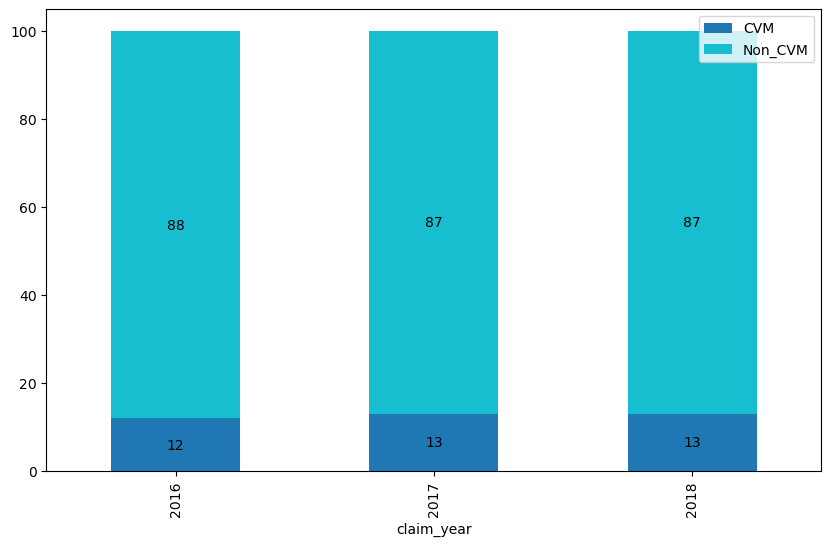

In [76]:
clm_count_by_year_cat_perc_100_stacked_bar_graph = clm_count_by_year_cat_perc_df.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))
for container in clm_count_by_year_cat_perc_100_stacked_bar_graph.containers:
    clm_count_by_year_cat_perc_100_stacked_bar_graph.bar_label(container, label_type='center')

# Gender demographics analysis 

# Find the total number of distinct claims from prepared dataset by year for CVM claims for patient gender

In [77]:
# Group by 'claim_year', 'patient_gender' and then count the 'claim_id'
gender_claim_count = cardiac_uniq_df.groupby(['claim_year', 'patient_gender'])['claim_id'].count().reset_index()


# Pivot the dataframe
pivot_gender_claim = gender_claim_count.pivot(index='claim_year', columns='patient_gender', values='claim_id').reset_index()

# Rename the columns
pivot_gender_claim.columns = ['Year', 'Female', 'Male']


pivot_gender_claim

,Year,Female,Male
0,2016,2128,1434
1,2017,2442,1598
2,2018,2774,2049


# A stacked bar chart to visualize the results

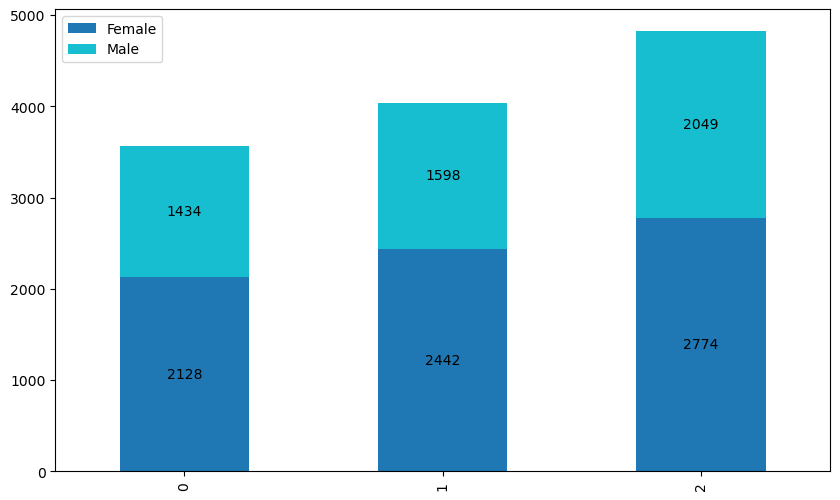

In [78]:
cvm_clm_count_by_gender_cat_perc_100_stacked_bar_graph = pivot_gender_claim.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))
for container in cvm_clm_count_by_gender_cat_perc_100_stacked_bar_graph.containers:
    cvm_clm_count_by_gender_cat_perc_100_stacked_bar_graph .bar_label(container, label_type='center')

# Business Insights

1.Even though the share of the cardiac category in the market remains relatively stable, moving from 12% to 13% suggests a slight but significant uptick in its importance within the HCPCS/CPT categories. This could indicate a growing recognition of cardiac-related treatments or diagnostics in the healthcare market and there may be unrealized potential to increase this category even further.The sales force might need to be bolstered, especially in areas where the rise in CVM conditions is most pronounced.

2.The steady figures of 13% for the past two years imply that there is an ongoing demand for cardiac-related care. This suggests a steady customer base, which is advantageous for companies in this industry.

3.Given the cardiac category's relative stability, it's possible that neither the market nor the actions of competitors will fluctuate significantly in relation to this particular segment. To make sure their competitors keep or expand their market share, companies need, nevertheless, keep a close eye on their tactics.

4.The gender demographics analysis of the patients shows that there is an steady increase in the number of CVM claims for both genders. Nonetheless, a higher percentage of women than men account for CVM claims and the gap between female and male CVM claims appears to be widening.This might suggest that women are either more susceptible to CVM conditions, or they are more proactive in seeking medical care for these conditions than their male counterparts.

5.Sales and marketing materials should be customized to target female-specific concerns, risk factors, and treatment alternatives because females seem to have a higher prevalence of CVM claims.

6.The Non-CVM category, which holds a dominating 87-88% of the market share, accounts for the vast majority of claims.This could indicate that the market is heavily oriented towards non-cardiac vascular metabolism related services.

7.The majority of the sales team must be dedicated to non-CVM claims while making sure CVM isn't neglected.

8.Use materials designed for patients with and without CVM to improve the patient experience. Given the significant gender gap in CVM claims,we need to develop materials tailored to a particular gender while keeping in mind the age demographics.

9.Divide the market of CVM and Non CVM based on geographics,revenue etc and evaluate the segments to allocate the neccessary team of sales reps.



# Q2. Evaluate the HCP behavior in context of claim volume from 2016-2018. How many HCPs are submitting 1 CVM claim; how many HCPs are associated with more than 10 claims, etc.? Once you perform this analysis, explain how this trend can influence the sales force deployment. That is, how would you segment the HCPs and how would you allocate In-Person (sales force) vs Non-Personal Promotio

# Count the number of CVM claims per year and provider (NPI)

In [79]:
num_cardiac_clm_by_yr_npi_df = cardiac_uniq_df.groupby(
    ['claim_year', 'npi_id']
).agg({'claim_id': 'count'}).reset_index()
num_cardiac_clm_by_yr_npi_df.sort_values('claim_id', ascending=False)

,claim_year,npi_id,claim_id
6942,2018,1.538145e+09,138
7201,2018,1.619913e+09,97
3929,2017,1.538145e+09,84
5422,2018,1.063497e+09,73
4164,2017,1.619913e+09,68
...,...,...,...
2916,2017,1.184611e+09,1
2915,2017,1.184602e+09,1
2914,2017,1.184601e+09,1
2913,2017,1.174638e+09,1


# Categorize the number of claims into different buckets: 1, 2-4, 5-9, 10+ as 'Disease Aware', 'Trialists ', 'Rising Stars', 'High-Volume Prescribers '

In [80]:
cardiac_conditions = [
    (num_cardiac_clm_by_yr_npi_df['claim_id'] == 1),
    (num_cardiac_clm_by_yr_npi_df['claim_id'] >= 2) & (num_cardiac_clm_by_yr_npi_df['claim_id'] < 5),
    (num_cardiac_clm_by_yr_npi_df['claim_id'] >= 5) & (num_cardiac_clm_by_yr_npi_df['claim_id'] < 10),
    (num_cardiac_clm_by_yr_npi_df['claim_id'] >= 10) 
]

letters = ['Disease Aware', 'Trialists ', 'Rising Stars', 'High-Volume Prescribers ']

num_cardiac_clm_by_yr_npi_df['bucket'] = np.select(cardiac_conditions, letters)
num_cardiac_clm_by_yr_npi_df

,claim_year,npi_id,claim_id,bucket
0,2016,1.003058e+09,1,Disease Aware
1,2016,1.003285e+09,1,Disease Aware
2,2016,1.003802e+09,1,Disease Aware
3,2016,1.003803e+09,1,Disease Aware
4,2016,1.003803e+09,1,Disease Aware
...,...,...,...,...
8347,2018,1.992920e+09,1,Disease Aware
8348,2018,1.992942e+09,1,Disease Aware
8349,2018,1.992952e+09,1,Disease Aware
8350,2018,1.992978e+09,1,Disease Aware


# Find the number of providers (NPI) per year and bucket, and pivot t

In [81]:
cardiac_clm_group_by_yr_npi_df = num_cardiac_clm_by_yr_npi_df.groupby(
    ['bucket', 'claim_year']
).agg({'npi_id': 'count'}).reset_index().sort_values(['bucket','claim_year'])
cardiac_clm_group_by_yr_npi_df

,bucket,claim_year,npi_id
0,Disease Aware,2016,2216
1,Disease Aware,2017,2486
2,Disease Aware,2018,2829
3,High-Volume Prescribers,2016,37
4,High-Volume Prescribers,2017,34
5,High-Volume Prescribers,2018,45
6,Rising Stars,2016,23
7,Rising Stars,2017,26
8,Rising Stars,2018,20
9,Trialists,2016,166


In [82]:
cardiac_clm_group1_by_yr_npi_df = cardiac_clm_group_by_yr_npi_df.pivot(
    index='claim_year', columns='bucket', values='npi_id'
).reset_index().rename_axis(None, axis=1).set_index('claim_year')[['Disease Aware', 'Trialists ', 'Rising Stars', 'High-Volume Prescribers ']]
cardiac_clm_group1_by_yr_npi_df

,Disease Aware,Trialists,Rising Stars,High-Volume Prescribers
claim_year,,,,
2016,2216,166,23,37
2017,2486,222,26,34
2018,2829,248,20,45


# Growth Rate Analysis

# A table with year-over-year change percentage in the claim volume for each segment

In [83]:
# Calculating year-over-year change in claim_volume for each segment
cardiac_clm_group_by_yr_npi_df['yoy_change'] = cardiac_clm_group_by_yr_npi_df.groupby('bucket')['npi_id'].pct_change() * 100
# Replace NaN with 'Base Year'
cardiac_clm_group_by_yr_npi_df['yoy_change'].fillna('Base Year', inplace=True)
# Pivot the table for better readability
pivot1_df = cardiac_clm_group_by_yr_npi_df.pivot(index='claim_year', columns='bucket', values='yoy_change')

(pivot1_df)

bucket,Disease Aware,High-Volume Prescribers,Rising Stars,Trialists
claim_year,,,,
2016,Base Year,Base Year,Base Year,Base Year
2017,12.184116,-8.108108,13.043478,33.73494
2018,13.797265,32.352941,-23.076923,11.711712


# Create a stacked bar graph

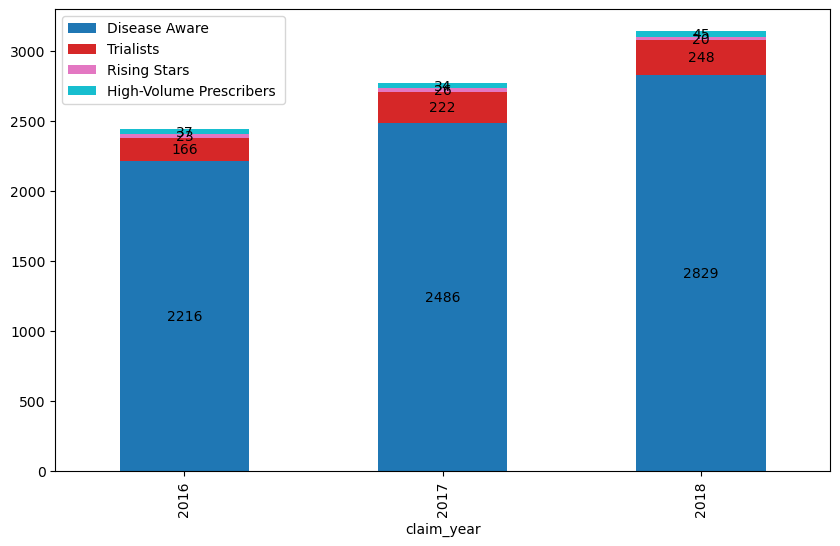

In [84]:
cardiac_clm_group_by_yr_npi_stacked_bar_graph = cardiac_clm_group1_by_yr_npi_df.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))
for container in cardiac_clm_group_by_yr_npi_stacked_bar_graph.containers:
    cardiac_clm_group_by_yr_npi_stacked_bar_graph.bar_label(container, label_type='center')

# Buisness Insights

1.Disease Aware segment has been growing consistently over the years.It shows that, even if the number of HCPs who are prescribing CVM drugs is still small, more healthcare professionals are becoming aware of them and doing so.Since HCPs are just starting to prescribe CVM drugs to patients, sales representatives need to focus on educating HCPS about their product, benefits, and patient success stories. This needs to be done to a large volume of people therefore non personal promotions would be ideal. 

2.The Trailists segment is gradually expanding, which suggests that a shift from Disease Aware HCPs to Trialists is taking place.These professionals are getting more comfortable and trying out the medication more frequently.However there is a noticeable disparity in the numbers of disease aware HCPs and trailists.This group needs encouragement to prescribe more frequently. Sales Representatives need to provide workshops, product insights, and training sessions. It would be best to combine NPP for ongoing interaction with in-person visits to foster relationships.

3.Growth in the Rising Stars segment is noteworthy, but it is happening more slowly than in the Trialists segment. This suggests that fewer Trialists are transitioning into Rising Stars.Rising Stars require a  higher focus on in-person visits to nurture the relationship, given their potential to become High-Volume prescribers.Sales Representatives need to provide them with advanced training, opportunities for peer networking, and acknowledgement of their increasing importance.

4.High Volume Prescribers have seen a consistent increase in numbers.This group is important since they have an important role in whether or not CVM drugs are prescribed.The sales force should prioritize High-Volume Prescribers by making more in-person visits and implementing tailored NPP campaigns.They must be provided with new research and development and product launch updates along with opportunities for peer networking, and acknowledgement of their high importance.

# Q3. Evaluate the Patient Age demographics in the context of claim volume from 2016-2018. Bucket the patients into groups based on their age and explain the trends. How would you position the Marketing Budgets and the Promotions with respect to the changing landscape of the CVM claims and the respective patient segments?

# Count the number of CVM claims per year for the patient demographics

In [85]:
num_cardiac_clm_by_yr_patient_age_df = cardiac_uniq_df.groupby(
    ['claim_year', 'patient_age']
).agg({'claim_id': 'count'}).reset_index()
num_cardiac_clm_by_yr_patient_age_df.sort_values('claim_id', ascending=False)

,claim_year,patient_age,claim_id
170,2018,70,339
168,2018,68,286
171,2018,71,279
167,2018,67,261
100,2017,67,241
...,...,...,...
140,2018,40,1
13,2016,46,1
12,2016,45,1
144,2018,44,1


# Categorize the number of claims into different buckets of age groups : 18-59,60-69,70-79,80+

In [86]:
cardiac_age_conditions = [
    (num_cardiac_clm_by_yr_patient_age_df['patient_age'] >= 18) & (num_cardiac_clm_by_yr_patient_age_df['patient_age'] <= 59),
    (num_cardiac_clm_by_yr_patient_age_df['patient_age'] >= 60) & (num_cardiac_clm_by_yr_patient_age_df['patient_age'] <= 69),
    (num_cardiac_clm_by_yr_patient_age_df['patient_age'] >= 70) & (num_cardiac_clm_by_yr_patient_age_df['patient_age'] <= 79),
    (num_cardiac_clm_by_yr_patient_age_df['patient_age'] >= 80) 
]

letters = ['18-59', '60-69 ', '70-79', '80+']

num_cardiac_clm_by_yr_patient_age_df['bucket'] = np.select(cardiac_age_conditions, letters)
num_cardiac_clm_by_yr_patient_age_df

,claim_year,patient_age,claim_id,bucket
0,2016,28,2,18-59
1,2016,30,7,18-59
2,2016,32,26,18-59
3,2016,33,7,18-59
4,2016,35,2,18-59
...,...,...,...,...
195,2018,95,12,80+
196,2018,96,1,80+
197,2018,97,18,80+
198,2018,98,3,80+


# Find the number of claims per year and bucket, and pivot t

In [87]:
cardiac_clm_group_by_yr_patient_age_df = num_cardiac_clm_by_yr_patient_age_df.groupby(
    ['bucket', 'claim_year']
).agg({'claim_id': 'sum'}).reset_index().sort_values(['bucket','claim_year'])
cardiac_clm_group_by_yr_patient_age_df

,bucket,claim_year,claim_id
0,18-59,2016,321
1,18-59,2017,383
2,18-59,2018,422
3,60-69,2016,1269
4,60-69,2017,1331
5,60-69,2018,1369
6,70-79,2016,1043
7,70-79,2017,1398
8,70-79,2018,1757
9,80+,2016,929


In [88]:
cardiac_clm_group_by_yr_patient_age1_df = cardiac_clm_group_by_yr_patient_age_df.pivot(
    index='claim_year', columns='bucket', values='claim_id'
).reset_index().rename_axis(None, axis=1).set_index('claim_year')[['18-59', '60-69 ', '70-79', '80+']]
cardiac_clm_group_by_yr_patient_age1_df

,18-59,60-69,70-79,80+
claim_year,,,,
2016,321,1269,1043,929
2017,383,1331,1398,928
2018,422,1369,1757,1275


# Create a stacked bar graph

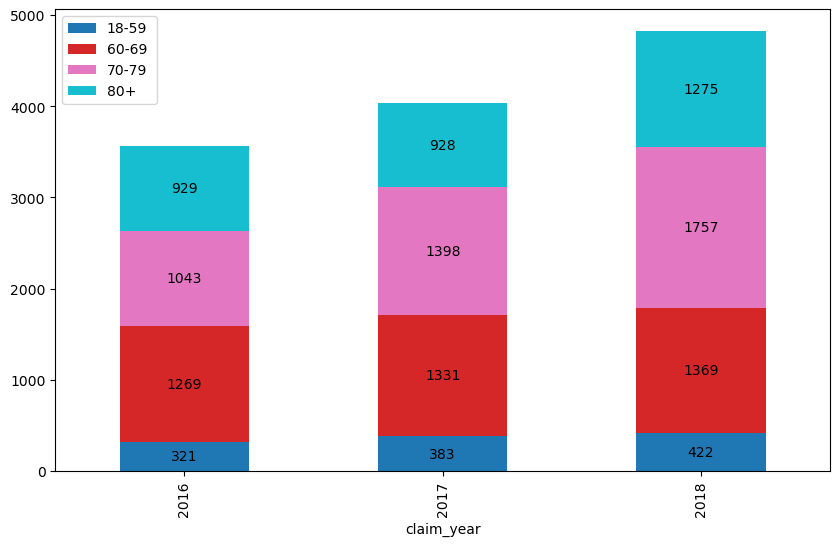

In [89]:
cardiac_clm_group_by_yr_patient_age_stacked_bar_graph = cardiac_clm_group_by_yr_patient_age1_df.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))
for container in cardiac_clm_group_by_yr_patient_age_stacked_bar_graph.containers:
    cardiac_clm_group_by_yr_patient_age_stacked_bar_graph.bar_label(container, label_type='center')

# A table with year-over-year change percentage in the claim volume for each segment

In [90]:
# Calculating year-over-year change in claim_volume for each segment
cardiac_clm_group_by_yr_patient_age_df['yoy_change'] = cardiac_clm_group_by_yr_patient_age_df.groupby('bucket')['claim_id'].pct_change() * 100
# Replace NaN with 'Base Year'
cardiac_clm_group_by_yr_patient_age_df['yoy_change'].fillna('Base Year', inplace=True)
# Pivot the table for better readability
pivot_df = cardiac_clm_group_by_yr_patient_age_df.pivot(index='claim_year', columns='bucket', values='yoy_change')

(pivot_df)

bucket,18-59,60-69,70-79,80+
claim_year,,,,
2016,Base Year,Base Year,Base Year,Base Year
2017,19.314642,4.885737,34.036433,-0.107643
2018,10.182768,2.854996,25.679542,37.392241


# Cost Analysis

# Find the total cost of CVM claims per year for the patient demographics

In [91]:
# Grouping by 'claim_year' and 'patient_age' to get the total 'claim_cost' for each combination
total_claim_cost_by_year_age_df = cardiac_uniq_df.groupby(['claim_year', 'patient_age']).agg({'claim_cost': 'sum'}).reset_index()

# Sorting the DataFrame by 'claim_cost' in descending order
total_claim_cost_by_year_age_df = total_claim_cost_by_year_age_df.sort_values('claim_cost', ascending=False)

# Displaying the DataFrame
total_claim_cost_by_year_age_df

,claim_year,patient_age,claim_cost
167,2018,67,132583.97
100,2017,67,76442.54
166,2018,66,51251.03
169,2018,69,39469.71
143,2018,43,36264.13
...,...,...,...
148,2018,48,3.00
13,2016,46,3.00
132,2017,99,3.00
74,2017,41,3.00


# Categorize the total cost of claims into different buckets of age groups : 18-59,60-69,70-79,80+

In [92]:
cardiac_age_conditions_cost = [
    (total_claim_cost_by_year_age_df['patient_age'] >= 18) & (total_claim_cost_by_year_age_df['patient_age'] <= 59),
    (total_claim_cost_by_year_age_df['patient_age'] >= 60) & (total_claim_cost_by_year_age_df['patient_age'] <= 69),
    (total_claim_cost_by_year_age_df['patient_age'] >= 70) & (total_claim_cost_by_year_age_df['patient_age'] <= 79),
    (total_claim_cost_by_year_age_df['patient_age'] >= 80) 
]

letters = ['18-59', '60-69 ', '70-79', '80+']

total_claim_cost_by_year_age_df['bucket'] = np.select(cardiac_age_conditions_cost, letters)
total_claim_cost_by_year_age_df

,claim_year,patient_age,claim_cost,bucket
167,2018,67,132583.97,60-69
100,2017,67,76442.54,60-69
166,2018,66,51251.03,60-69
169,2018,69,39469.71,60-69
143,2018,43,36264.13,18-59
...,...,...,...,...
148,2018,48,3.00,18-59
13,2016,46,3.00,18-59
132,2017,99,3.00,80+
74,2017,41,3.00,18-59


# Find the total cost of claims per year and bucket, and pivot t

In [93]:
total_claim_cost_by_year_age_df = total_claim_cost_by_year_age_df.groupby(
    ['bucket', 'claim_year']
).agg({'claim_cost': 'sum'}).reset_index().sort_values(['bucket','claim_year'])
total_claim_cost_by_year_age_df

,bucket,claim_year,claim_cost
0,18-59,2016,44969.89
1,18-59,2017,48268.44
2,18-59,2018,74865.99
3,60-69,2016,110403.28
4,60-69,2017,186590.68
5,60-69,2018,298471.16
6,70-79,2016,76757.02
7,70-79,2017,153274.77
8,70-79,2018,165098.04
9,80+,2016,73923.42


In [94]:
total_claim_cost_by_year_age_df= total_claim_cost_by_year_age_df.pivot(
    index='claim_year', columns='bucket', values='claim_cost'
).reset_index().rename_axis(None, axis=1).set_index('claim_year')[['18-59', '60-69 ', '70-79', '80+']]
total_claim_cost_by_year_age_df

,18-59,60-69,70-79,80+
claim_year,,,,
2016,44969.89,110403.28,76757.02,73923.42
2017,48268.44,186590.68,153274.77,78388.43
2018,74865.99,298471.16,165098.04,152743.45


# Plot the total cost for patient demographics on various years using a line plot

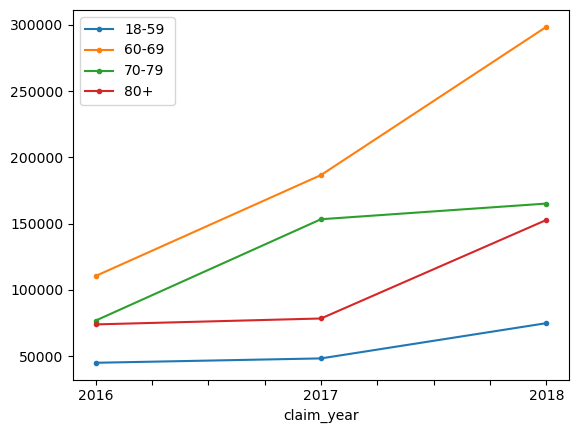

In [95]:
avg_clm_cost_graph = total_claim_cost_by_year_age_df.plot(kind='line', style='.-')

# Business Insights

1.The age groups 60-69,70-79 have remained stable with 10 claims each year. This indicates consistent demand from these segments.Spending for the age range 60–69 has increased incrementally despite steady numbers; however, the claim cost trend for the age group 70–79 is uneven, increasing until 2017 and then declining.   

2.From 2016 to 2017, the 80+ age group saw a slight uptick, but after that, it stabilized around 20 claims annually.Costs for the 80+ age group are steadily rising. 

3.Despite its growth, the 18-59 age segment consistently has the highest number of claims each year.The claim cost associated with this age is the highest and steadily increasing even though the number of claims is consistent. It could indicate that although the quantity of claims stays the same, the cost of the procedures or services being claimed has increased. This may be the result of things like inflation, rising medical equipment costs, more costly new therapies, or rising fees for medical practitioners.

4.The 18–59 age group is  large, thus there is room for greater market penetration.Online advertising, partnerships with wellness or fitness influencers, gyms, outlets, and campaigns that highlight preventative health measures are a few examples of strategies given the fact that its a young demographics.

5.For stable old segments 60-69,70-79 and 80+, sales must focus on maintaining their trust and will benefit from traditional advertising campaigns like health awareness campaigns, community outreach programs, educational programs that highlight the advantages and significance of CVM drugs. Here, workshops, lectures, and educational pamphlets can be effective.


6.Allocate a larger portion of the money to the 18–59 age range because they are a growing and sizable demographic. By doing so, you can take advantage of the momentum and even increase the segment's share.

7.Keep the current budgetary allotments in place in light of the elder segments' steady demand. Retention and ongoing education are the main priorities here.

8.Given the increase in claim costs, it might be valuable to provide information on cost-effective treatment options or preventive measures to avoid costly treatments in the future.There's a noticeable increase in claim costs for almost all age segments. Tailoring promotions and services to cater to this demographic might be beneficial.

9.Implementing feedback mechanisms will be helpful to understand the effectiveness of the marketing strategies and promotions.

10.Take into account time-limited deals,specialized offers or promotions aimed at particular age groups.
